<a href="https://colab.research.google.com/github/Nehueiy/Student_score_prediction/blob/main/student_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Step 1: Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [21]:
# Step 2: Load dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [23]:
# Step 3: Clean and explore the data
df.columns = df.columns.str.strip()  # Remove spaces from column names
print("Dataset Preview:")
display(df.head())

print("\n Dataset Info:")
df.info()

print("\n Missing Values Check:")
print(df.isnull().sum())

Dataset Preview:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes

 Missing Values Check:
Hours     0
Scores    0
dtype: int64


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Hours'].plot(kind='hist', bins=20, title='Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Scores'].plot(kind='hist', bins=20, title='Scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Hours', y='Scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Hours']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Hours')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Scores']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Scores')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Hours'].plot(kind='line', figsize=(8, 4), title='Hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Scores'].plot(kind='line', figsize=(8, 4), title='Scores')
plt.gca().spines[['top', 'right']].set_visible(False)

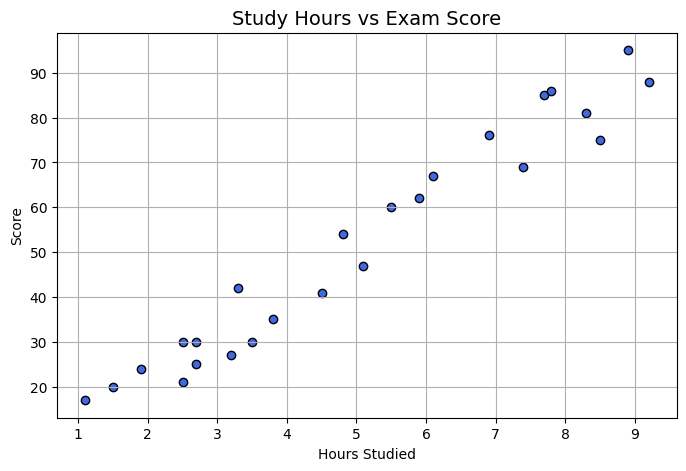

In [24]:
# Step 4: Visualize the relationship between Hours & Scores
plt.figure(figsize=(8, 5))
plt.scatter(df['Hours'], df['Scores'], color='royalblue', edgecolors='black')
plt.title('Study Hours vs Exam Score', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid(True)
plt.show()


In [25]:
# Step 5: Split the data into training and testing sets
X = df[['Hours']]  # Keep it 2D
y = df['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 20
Testing samples: 5


In [26]:
# Step 6: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Step 7: Show the model equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"\n Model Equation: score = {slope:.2f} * hours + {intercept:.2f}")


 Model Equation: score = 9.68 * hours + 2.83


In [ ]:
# Step 8: Predict scores on the test set
y_pred = model.predict(X_test)

In [ ]:
# Step 9: Compare actual vs predicted
results = pd.DataFrame({
    'Hours': X_test.values.flatten(),
    'Actual Score': y_test.values,
    'Predicted Score': y_pred
})
results = results.sort_values(by='Hours').reset_index(drop=True)
display(results)

,Hours,Actual Score,Predicted Score
0,2.5,30,27.032088
1,2.5,21,27.032088
2,5.9,62,59.951153
3,6.9,76,69.633232
4,8.3,81,83.188141


In [28]:
# step 10: 📏 Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")


Mean Squared Error (MSE): 18.94
R-squared Score (R²): 0.97


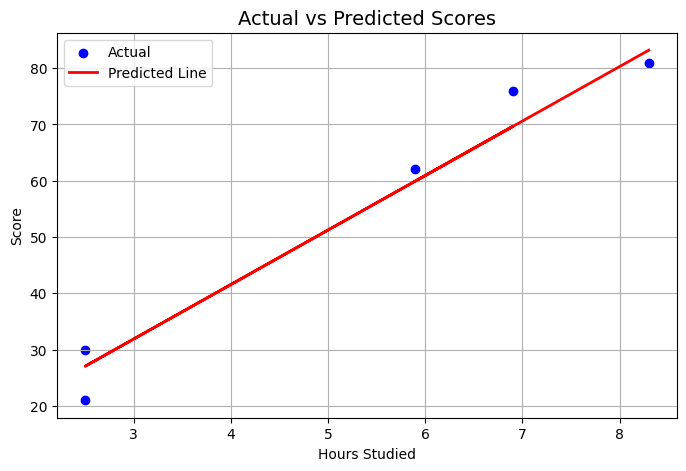

In [29]:
# step 11: Visualize actual vs predicted scores
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Actual vs Predicted Scores', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# BONUS: Polynomial Regression Model
#  Step 1: Transform input features into polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Creates [1, X, X^2]


In [ ]:
#  Step 2: Split polynomial features into train and test sets
X_poly_train, X_poly_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

In [ ]:
#  Step 3: Train a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
#  Step 4: Make predictions
y_poly_pred = poly_model.predict(X_poly_test)



 Polynomial Regression (degree=2) Evaluation:
Mean Squared Error: 21.07
R-squared Score: 0.96


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


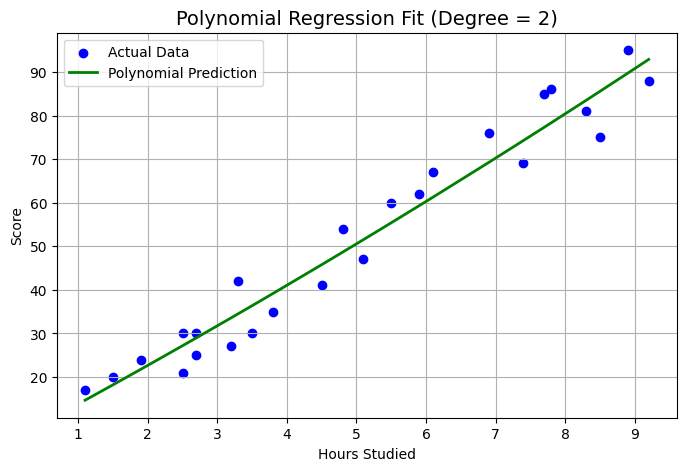

In [30]:
#  Step 5: Evaluate model performance
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"\n Polynomial Regression (degree=2) Evaluation:")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared Score: {r2_poly:.2f}")

# Step 6: Visualize the curve of polynomial regression
# Sort the X values for a smooth line
X_sorted = np.sort(X.values, axis=0)
X_sorted_poly = poly.transform(X_sorted)
y_poly_line = poly_model.predict(X_sorted_poly)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_sorted, y_poly_line, color='green', linewidth=2, label='Polynomial Prediction')
plt.title('Polynomial Regression Fit (Degree = 2)', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()